# Implementing Probability Distributions to the data (Categorical, Bernoulli)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('future.no_silent_downcasting', True)

house_dataset = pd.read_excel('processed_file_new.xlsx')

house_dataset.head(5)

,category,price,currency,price_1m2,title,address,area,title_deed,repair,room_number,region,region_new
0,kohne,137 000,AZN,2 630 AZN/m²,"Satilir 3 otaqli kohne tikili 52 m², 8-ci kilo...",Elshen Suleymanov kuc 137,52 m²,var,var,3,8-ci kilometr,Nizami
1,yeni,183 000,AZN,1 790 AZN/m²,"Satilir 2 otaqli yeni tikili 102 m², Neftchile...",Mehdi Abbasov kucesi,102 m²,yoxdur,var,2,Neftchiler,Nizami
2,kohne,145 000,AZN,2 230 AZN/m²,"Satilir 2 otaqli kohne tikili 65 m², Nerimanov r.",Ataturk Prospekti,65 m²,var,var,2,Nerimanov,Nerimanov
3,kohne,190 000,AZN,2 000 AZN/m²,"Satilir 3 otaqli kohne tikili 95 m², Genclik m.",Ataturk pr,95 m²,var,var,3,Genclik,Nerimanov
4,yeni,294 000,AZN,1 550 AZN/m²,"Satilir 3 otaqli yeni tikili 190 m², Nesimi r.",Mohsun Senani kucesi,190 m²,var,yoxdur,3,Nesimi,Nerimanov


# Data preprocessing and encoding the data to the integer values

In [12]:
from sklearn.preprocessing import LabelEncoder

house_dataset['area'] = house_dataset['area'].str.replace('m²', '', regex=False).str.replace(' ', '').str.split('.').str[0].astype(int)
house_dataset['repair'] = house_dataset['repair'].fillna('yoxdur')
house_dataset['category'] = house_dataset['category'].replace({'kohne':0, 'yeni':1})
house_dataset['title_deed'] = house_dataset['title_deed'].replace({'yoxdur':0, 'var':1})
house_dataset['repair'] = house_dataset['repair'].replace({'yoxdur':0, 'var':1})
le = LabelEncoder()
house_dataset['region_new'] = le.fit_transform(house_dataset['region_new'])
house_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35457 entries, 0 to 35456
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     35457 non-null  object
 1   price        35457 non-null  object
 2   currency     35457 non-null  object
 3   price_1m2    35457 non-null  object
 4   title        35457 non-null  object
 5   address      35457 non-null  object
 6   area         35457 non-null  int64 
 7   title_deed   35457 non-null  object
 8   repair       35457 non-null  object
 9   room_number  35457 non-null  int64 
 10  region       35457 non-null  object
 11  region_new   35457 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 3.2+ MB


# Calculating the probabilities of category(new, old), title_deed, and repair variables

In [13]:
counts_category = house_dataset['category'].value_counts()
counts_deed = house_dataset['title_deed'].value_counts()
counts_repair = house_dataset['repair'].value_counts()

probabilities_category = counts_category/counts_category.sum()
probabilities_deed = counts_deed/counts_deed.sum()
probabilities_repair = counts_repair/counts_repair.sum()


# Implementing Bernoulli distribution to the category variable

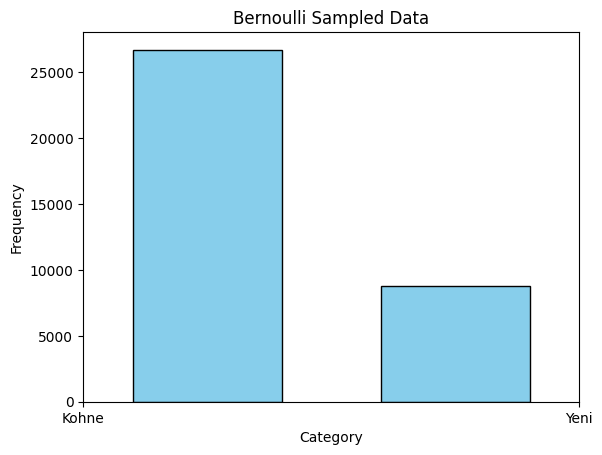

In [14]:
from scipy.stats import bernoulli
n_category = len(house_dataset['category'])

data_category = bernoulli.rvs(probabilities_category[0], size=n_category)

plt.hist(data_category, bins=2, rwidth=0.6, color='skyblue', edgecolor='black')
plt.xticks([0,1], ['Kohne','Yeni'])
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bernoulli Sampled Data')
plt.show()

# Implementing bernoulli distribution to the title_deed variable

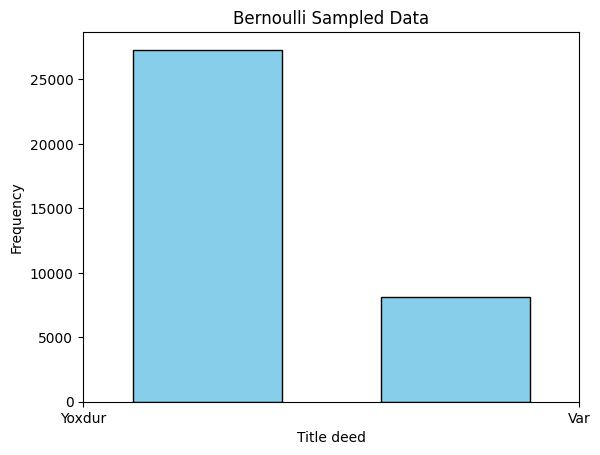

In [15]:
n_deed = len(house_dataset['title_deed'])

data_deed = bernoulli.rvs(probabilities_deed[0], size=n_deed)

plt.hist(data_deed, bins=2, rwidth=0.6, color='skyblue', edgecolor='black')
plt.xticks([0,1], ['Yoxdur','Var'])
plt.xlabel('Title deed')
plt.ylabel('Frequency')
plt.title('Bernoulli Sampled Data')
plt.show()

# Implementing bernoulli distribution to the repair variable

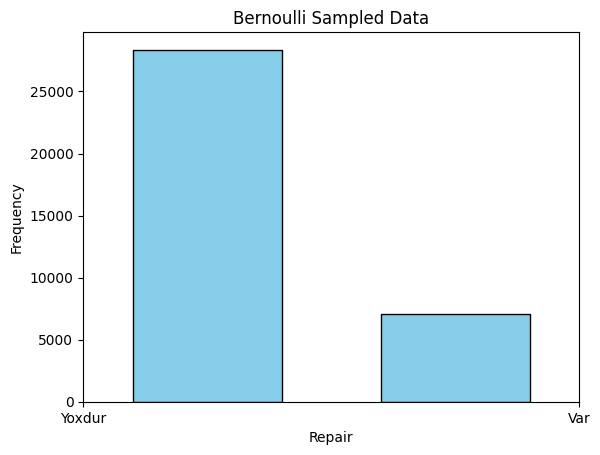

In [16]:
n_repair = len(house_dataset['repair'])

data_repair = bernoulli.rvs(probabilities_repair[0], size=n_repair)

plt.hist(data_repair, bins=2, rwidth=0.6, color='skyblue', edgecolor='black')
plt.xticks([0,1], ['Yoxdur','Var'])
plt.xlabel('Repair')
plt.ylabel('Frequency')
plt.title('Bernoulli Sampled Data')
plt.show()

# Implementing Categorical distribution to the room_number variable

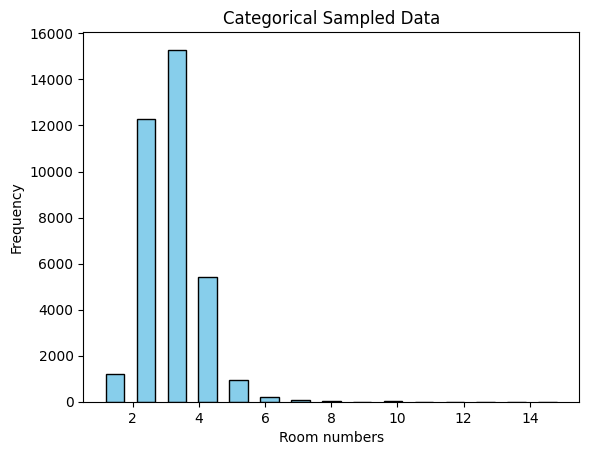

In [17]:
from numpy.random import choice

n_rooms = len(house_dataset['room_number'])
rooms = sorted(house_dataset['room_number'].unique())
probabilities_room = house_dataset['room_number'].value_counts(normalize=True).reindex(rooms).values

data_rooms = choice(rooms, size=n_rooms, p=probabilities_room)

plt.hist(data_rooms, bins=15, rwidth=0.6, color='skyblue', edgecolor='black')
plt.xlabel('Room numbers')
plt.ylabel('Frequency')
plt.title('Categorical Sampled Data')
plt.show()

# Implementing Categorical distribution to the region variable

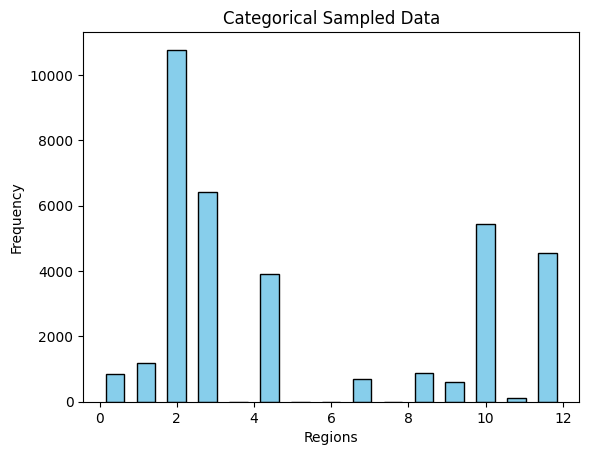

In [18]:
n_regions = len(house_dataset['region_new'])
regions = sorted(house_dataset['region_new'].unique())
probabilities_region = house_dataset['region_new'].value_counts(normalize=True).reindex(regions).values

data_regions = choice(regions, size=n_regions, p=probabilities_region)

plt.hist(data_regions, bins=15, rwidth=0.6, color='skyblue', edgecolor='black')
plt.xlabel('Regions')
plt.ylabel('Frequency')
plt.title('Categorical Sampled Data')
plt.show()

# Implementing Gaussian distribution to the area variable

# Previous ones like categorical or bernoulli is ideal for few different features, but in area variable we have a lot features that's why i used gaussian model

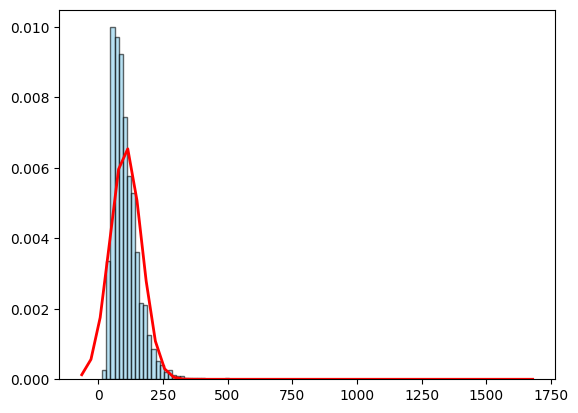

In [19]:
from scipy.stats import norm

mean = house_dataset['area'].mean()
std = house_dataset['area'].std()
n_areas = len(house_dataset['area'])

plt.hist(house_dataset['area'], bins=100, density=True, alpha=0.6, color='skyblue', edgecolor='black')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r-', lw=2)
plt.show()

# From the graph, it's clear that we have more outliers(up to 1750 m2), plus our data looks like right-skewed which is non-symmetrical and also data looks like much sharper than a normal distribution(red line is below than actual data in the middle)

# To verify this, we need to measure the skew and kurtosis of area variable

In [20]:
from scipy.stats import skew, kurtosis

data = house_dataset['area']

print("Skewness:", skew(data))
print("Kurtosis:", kurtosis(data)) 

Skewness: 4.2800644974740365
Kurtosis: 50.22967610351587


# Skewness 4 means that our data is right-skewed, kurtosis 50 means extremely leptokurtic